In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np

In [2]:
# os.system("aws --region us-west-1 ec2 describe-instances  --query 'Reservations[*].Instances[*].[PrivateIpAddress]' --output text > all_internal_ips")

# os.system("aws --region us-west-1 ec2 describe-instances  --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_external_ips")

In [3]:
# time.sleep(40)

In [4]:
with open('all_external_ips') as f:
    lines = f.read().splitlines()


lines = [x for x in lines if x!='None']
lines

for ip in lines:
    if ip!='None':
        current = (ip.split('.'))

        print('ssh -i "MAKWest.pem" ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com')

ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com


## Set number of clusters

In [5]:
nclusters = 0

for folder in os.listdir('.'):
    if 'config' in folder and folder!='config':
        nclusters = nclusters + 1
        
        
print(nclusters)


total_count = 8


nreplicas = int(total_count/nclusters)
nodeIps = lines[:nclusters* nreplicas]

nclients = 2

# no_cluster_yet_nodes = lines[nclusters* nreplicas:-(nclusters)]
no_cluster_yet_nodes = lines[nclusters* nreplicas:-nclients]




# clientIps = lines[-(nclusters):]
clientIps = lines[-nclients:]



2


In [6]:
clientIps, no_cluster_yet_nodes

(['127.0.0.1', '127.0.0.1'], [])

## Functions

In [7]:
def setup(i):

    ip = lines[i]
    if ip!='None':
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'commands.sh'+' ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:commands.sh'
        
        
        os.system(command)

        
def compile_job(i):
    ip = lines[i]
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ./gradlew installDist'
        
        
        os.system(command)

        
        
def clean_job(i):
    ip = lines[i]
    
#     rm_command = 'sudo rm config/currentView; '
#     for iter_ in range(nclusters):
#         rm_command = rm_command + 'rm config'+str(iter_)+'/currentView; '
        
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S rm ../dump_files/nohup*.out; echo 1234 | sudo -S rm config*/currentView;'
        
        
        os.system(command)
        
        

        
def run_server_node(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
    if ip!='None' and( ip in nodeIps):
        
        current = (ip.split('.'))
        command = 'nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 & echo $! > ../dump_files/jobID_s'+str(i)+'.txt'
        
        
        os.system(command)
        
        
        
    if ip!='None' and( ip in no_cluster_yet_nodes):
        
        current = (ip.split('.'))
        command = 'nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 &'
        
        
        os.system(command)        
#         print(command)



def run_basic_client(i):
    cmd_arg = ''
    
    ip = lines[i]
    if ip!='None' and ip in clientIps:
#     if ip!='None' and ip in nodeIps[1:1+len(clientIps)]:
        
        current = (ip.split('.'))
        
#         cmd_arg = nodeIps[1:1+len(clientIps)].index(ip)
        
        for iter__ in range(len(clientIps)):
            if ip==clientIps[iter__]:
                cmd_arg = iter__
                
                
        
#         print(i, cmd_arg)
            
        current = (ip.split('.'))
        command = 'nohup ./runscripts/ycsbClient.sh '+str(i-len(nodeIps)-len(no_cluster_yet_nodes))+' >../dump_files/nohup_c'+str(i)+'.out 2>&1 &'

        
        os.system(command)


def kill_java(i):
    ip = lines[i]
    
    if ip!='None':
        current = (ip.split('.'))
        command = ' killall java; killall nohup'
        
        
        os.system(command)
        
        
        
def kill_clients(i):
    ip = lines[i]
    if ip!='None' and ip in clientIps:
        current = (ip.split('.'))
        command = 'killall java;  killall nohup"'
        
        
        os.system(command)

def run_server_node_check(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
    if ip!='None' and( ip in nodeIps):
        
        current = (ip.split('.'))
        command = ' nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 &'
        
        
        print(command)
        
        

# for i in range(len(lines)):
#     run_server_node_check(i)

def run_basic_client_check(i):
    cmd_arg = ''
    
    ip = lines[i]
    if ip!='None' and ip in clientIps:
        
        for iter__ in range(len(clientIps)):
            if ip==clientIps[iter__]:
                cmd_arg = iter__
                
                
        
#         print(i, cmd_arg)
            
        current = (ip.split('.'))
        command = 'nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../dump_files/nohup_c'+str(i)+'.out 2>&1 &'

        
        print(command)

# for i in range(len(lines)):
#     run_basic_client_check(i)



def join_node1(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11080 11081 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command)   
        
        
def join_node2(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11090 11091 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command) 
        
def join_node3(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11100 11101 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command) 

## Compile Job

## Setup Client and nodeIPS

In [8]:
len(lines)

10

In [9]:
len(nodeIps), len(clientIps)

(8, 2)

## RUN SERVERS

In [10]:
for i in range(len(lines)):
    kill_java(i)

for i in range(len(lines)):
    clean_job(i)
    
compile_job(1)



java(2705): Operation not permitted
java(3588): Operation not permitted
java(3682): Operation not permitted
java: no process found
nohup: no process found
java(2705): Operation not permitted
java(3588): Operation not permitted
java(3682): Operation not permitted
java: no process found
nohup: no process found
java(2705): Operation not permitted
java(3588): Operation not permitted
java(3682): Operation not permitted
java: no process found
nohup: no process found
java(2705): Operation not permitted
java(3588): Operation not permitted
java(3682): Operation not permitted
java: no process found
nohup: no process found
java(2705): Operation not permitted
java(3588): Operation not permitted
java(3682): Operation not permitted
java: no process found
nohup: no process found
java(2705): Operation not permitted
java(3588): Operation not permitted
java(3682): Operation not permitted
java: no process found
nohup: no process found
java(2705): Operation not permitted
java(3588): Operation not permitte

> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 1s
3 actionable tasks: 3 up-to-date


In [11]:
    
for i in range(len(lines)-nclients-len(no_cluster_yet_nodes)):
    print(i)
    run_server_node(i)

0
1
2
3
4
5
6
7


In [12]:
time.sleep(30)
!tail ../dump_files/nohup_s0.out -n 50

-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- receiving, null msg:null
-- <-- r

In [13]:


# for i in range(len(lines)):
#     kill_java(i)

In [14]:
len(nodeIps)+len(no_cluster_yet_nodes)+len(clientIps)


10

## Run basic client

In [15]:
for i in range(len(nodeIps)+len(no_cluster_yet_nodes),len(nodeIps)+len(no_cluster_yet_nodes)+len(clientIps)):
    run_basic_client(i)

In [16]:
time.sleep(150)

In [17]:

# time.sleep(30)
# run_server_node(8)
# time.sleep(15)
# join_node1(8)

# time.sleep(30)
# run_server_node(9)

# time.sleep(30)
# join_node2(9)

# time.sleep(30)
# run_server_node(10)
# time.sleep(30)
# join_node3(10)

In [18]:
# time.sleep(50)

# run_server_node(9)

# time.sleep(160)
# join_node2(9)


# for i in [2]:
#     os.system('kill -9 `cat ../dump_files/jobID_s2.txt`')
    


# time.sleep(80)



for i in range(len(lines)):
    kill_java(i)
    


java(2705): Operation not permitted
java(3588): Operation not permitted
java(3682): Operation not permitted
nohup: no process found
java(2705): Operation not permitted
java(3588): Operation not permitted
java(3682): Operation not permitted
nohup: no process found
java(2705): Operation not permitted
java(3588): Operation not permitted
java(3682): Operation not permitted
nohup: no process found
java(2705): Operation not permitted
java(3588): Operation not permitted
java(3682): Operation not permitted
nohup: no process found
java(2705): Operation not permitted
java(3588): Operation not permitted
java(3682): Operation not permitted
nohup: no process found
java(2705): Operation not permitted
java(3588): Operation not permitted
java(3682): Operation not permitted
nohup: no process found
java(2705): Operation not permitted
java(3588): Operation not permitted
java(3682): Operation not permitted
nohup: no process found
java(2705): Operation not permitted
java(3588): Operation not permitted
java

In [19]:
# for i in range(len(lines)):
#     kill_java(i)

## Main Job

In [20]:
def getTimesThputs(file):
    f = open(file, "r")
    data = f.readlines() 
    times = []
    thputs = []
    latencies = []
    for line in data:
        if not line.startswith('--') and 'current ops/sec; [UPDATE AverageLatency' in line:

#         print(line)
            times.append(line.split('sec:')[0].strip())
            thputs.append(line.split(';')[1].split('current')[0].strip())
            latencies.append(line.split('=')[1].split(']')[0].strip())

    return np.array(times).astype(float), np.array(thputs).astype(float), np.array(latencies).astype(float)  






def getTimeThps(file, flag):
    
    f = open(file, "r")
    data = f.readlines() 

    times = []
    thputs = []
    for line in data:
        if 'throughput[ops/s]' in line:
            lineData = (line[13+line.find('max[ops/s])>'):-2])
            print(lineData)

            times.append(lineData.split('|')[0])
            thputs.append(lineData.split('|')[-2])
    if (flag): 
        times.append(float(times[-1])+abs(float(times[-1]) - float(times[-2]) ))
        thputs.append(0)
        
    return np.array(times).astype(float), np.array(thputs).astype(float) 


In [21]:
## Byzantine Remote View Change

In [22]:
times ,thputs, lats = getTimesThputs('../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes))+'.out')
times2 ,thputs2, lats = getTimesThputs('../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes)+1)+'.out')


'../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes))+'.out'

'../dump_files/nohup_c8.out'

In [23]:
# times - times2

In [24]:
# thputs = thputs + thputs2

In [25]:
# np.mean(lats[20:]) # 23604.83205128205

In [26]:
np.mean(lats[20:])

59395.98547619048

In [27]:
lats

array([1099801.5 ,  372680.  ,  248005.  ,  211193.2 ,  244139.  ,
        189532.  ,  264859.  ,  197233.4 ,  149547.71,  189403.4 ,
         94414.09,  112145.75,  135023.12,   97499.4 ,  142779.57,
         94856.1 ,  169777.17,  114463.  ,  110880.7 ,   87408.75,
         77575.23,   86972.91,  105424.  ,  106183.67,   95445.5 ,
         94387.73,   83825.25,  112628.67,   79011.38,   95323.  ,
         83250.83,   83811.18,   77328.54,   94455.55,   80708.58,
         82756.25,   97405.  ,   86361.  ,   73166.07,   96037.4 ,
         81834.33,   91747.33,   81448.45,   84731.77,   65537.4 ,
         77655.38,   80766.17,   69722.33,   70363.21,   73591.15,
         74823.08,   99268.1 ,   82920.75,   86755.62,   74936.42,
         74725.93,   77846.83,   67132.5 ,   70454.93,   88641.73,
         79370.92,   75746.  ,   69970.27,   62770.  ,   77952.31,
         80549.85,   70832.86,   62559.38,   47363.  ,   56019.65,
         48880.52,   51987.  ,   56950.35,   54383.47,   47733

In [28]:
# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()


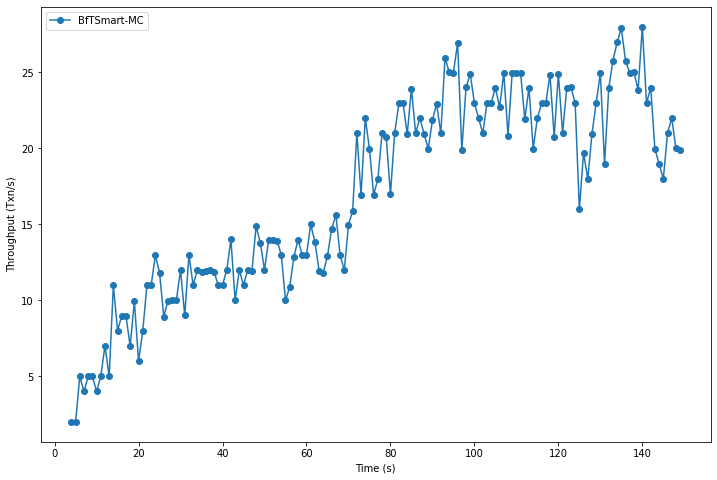

<Figure size 432x288 with 0 Axes>

In [29]:
import pylab as pl

pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Joins Throughput')

# pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

pl.xlabel('Time (s)')
pl.ylabel('Throughput (Txn/s)')
pl.legend()
# pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
pl.show()
pl.clf()


In [30]:
(thputs), np.sum(thputs)

(array([ 2.  ,  1.99,  4.99,  4.  ,  4.99,  5.  ,  4.  ,  5.  ,  7.  ,
         4.99, 10.99,  8.  ,  8.99,  8.99,  6.97,  9.94,  6.  ,  7.99,
        11.  , 10.99, 12.95, 11.82,  8.93,  9.98, 10.  ,  9.99, 11.99,
         9.  , 12.97, 11.  , 11.99, 11.88, 11.94, 12.  , 11.86, 10.98,
        11.  , 11.98, 14.  ,  9.99, 11.98, 11.  , 11.99, 11.9 , 14.87,
        13.79, 12.  , 13.99, 13.99, 13.93, 12.99,  9.99, 10.87, 12.85,
        13.99, 12.96, 12.97, 14.99, 13.86, 11.95, 11.82, 12.91, 14.71,
        15.62, 12.99, 11.98, 14.96, 15.89, 20.98, 16.93, 22.  , 19.96,
        16.93, 17.98, 20.98, 20.73, 16.97, 20.98, 22.95, 22.98, 20.92,
        23.93, 21.  , 21.98, 20.96, 19.96, 21.85, 22.93, 20.98, 25.97,
        25.  , 24.98, 26.92, 19.86, 24.  , 24.9 , 22.98, 21.98, 20.98,
        23.  , 22.98, 23.98, 22.7 , 24.95, 20.83, 24.98, 24.98, 24.98,
        21.91, 23.98, 19.98, 21.98, 22.95, 22.95, 24.85, 20.75, 24.9 ,
        21.  , 23.98, 24.  , 22.98, 16.  , 19.72, 17.98, 20.94, 22.98,
      

In [31]:
# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Joins Throughput')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()
